# Strategy 2.2 - Price to Earnings Strategy

In [1]:
import sys
import os
# Get the parent directory of the "notebook" folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
sys.path.append(project_root)

In [3]:
from strategies.ratio_value import RatioValueStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%reload_ext autoreload

In [6]:
file_name = '../data/PE RATIO.xlsx'

# Automatically use the current working directory (or adjust as needed)
current_dir = os.getcwd()
file_path = os.path.join(current_dir, file_name)

## In sample Backtest to determine the best parameters

In [8]:
# Define tickers and parameter grid
tickers = [
    "AAPL", "ABT", "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AJG", "AKAM",
    "ALB", "AMAT", "AMD", "AME", "AMGN", "AMT", "AMZN", "AON", "AOS", "APA",
    "APD", "APH", "ARE", "AVB", "AVY", "AXP", "AZO", "BA", "BAC", "BAX",
    "BBY", "BDX", "BEN", "BIIB", "BK", "BLK", "BMY", "BSX", "BXP", "C",
    "CAG", "CAH", "CAT", "CB", "CCI", "CDNS", "CHD", "CHRW", "CINF", "CL",
    "CLX", "CMI", "CNP", "COO", "COP", "COST", "CPB", "CPRT", "CSCO", "CTAS",
    "CTSH", "D", "DE", "DGX", "DHI", "DIS", "DLTR", "DOV", "DRI", "DTE",
    "DVA", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "EMN", "EMR",
    "EOG", "EQR", "ES", "ESS", "F", "FAST", "FCX", "FDX", "FE", "FFIV",
    "FITB", "FRT", "GD", "GE", "GILD", "GIS", "GPC", "GWW", "HAL", "HAS"
] # Add more tickers as needed
frequencies = ['weekly', 'monthly', '6month']
K = [0.5, 1, 1.5]

In [9]:


# Initialize final results container
all_results = {}
best_params = []

# Loop over each ticker
for ticker in tickers:
    print(f"\n--- Evaluating {ticker} ---")

    try:
        # Initialize data
        data_handler = DataHandler(ticker=ticker, start_date='2004-12-12', end_date='2015-12-12')
        prices = data_handler.fetch_data()
        pe_series = data_handler.fetch_pe_series(file_path)

        if pe_series.empty:
            print(f"Skipping {ticker}: No valid PE data in selected date range.")
            continue

        results = {}

        # Loop over each frequency and threshold
        for freq in frequencies:
            results[freq] = {}
            for thresh in K:
                print(f"\nTesting {freq} frequency strategy with k={thresh} for {ticker}:")

                # Initialize strategy
                strategy = RatioValueStrategy(pe_series, "PE", window=5, k=thresh, frequency=freq)

                # Run backtest
                backtest = Backtest(
                    data=prices,
                    strategy=strategy,
                    plot_results=False
                )

                # Store results
                result = backtest.run()
                results[freq][thresh] = result

                # Print metrics
                print(f"Final Portfolio Value: ${result['Final Value']:,.2f}")
                print(f"Total Return: {result['Return']:.2%}")
                print(f"Sharpe Ratio: {result['Sharpe Ratio']:.2f}")
                print(f"Max Drawdown: {result['Max Drawdown']:.2%}")

        # Save all results for this ticker
        all_results[ticker] = results

        # Flatten and create comparison DataFrame
        comparison = pd.concat({
            freq: pd.DataFrame.from_dict(results[freq], orient='index')
            for freq in frequencies
        }, names=['Frequency', 'k'])

        # Find best combo based on Sharpe Ratio
        best_idx = comparison['Sharpe Ratio'].idxmax()
        best_row = comparison.loc[best_idx]
        best_params.append({
            'Ticker': ticker,
            'Best Frequency': best_idx[0],
            'Best k': best_idx[1],
            'Sharpe Ratio': best_row['Sharpe Ratio'],
            'Total Return': best_row['Return'],
            'Final Value': best_row['Final Value'],
            'Max Drawdown': best_row['Max Drawdown']
        })

        # Optionally show per-stock comparison table
        print("\nStrategy Comparison Table:")
        print(comparison.round(4))

    except Exception as e:
        print(f"Skipping {ticker} due to error: {e}")
        continue

# Convert best parameter summary to DataFrame
best_params_df = pd.DataFrame(best_params)
print("\n=== Summary of Best Parameters by Ticker ===")
print(best_params_df.round(4))


--- Evaluating AAPL ---
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AAPL:
Final Portfolio Value: $136,697.20
Total Return: 36.70%
Sharpe Ratio: 0.24
Max Drawdown: -65.41%

Testing weekly frequency strategy with k=1 for AAPL:
Final Portfolio Value: $241,263.86
Total Return: 141.26%
Sharpe Ratio: 0.44
Max Drawdown: -58.06%

Testing weekly frequency strategy with k=1.5 for AAPL:
Final Portfolio Value: $170,399.60
Total Return: 70.40%
Sharpe Ratio: 0.32
Max Drawdown: -64.68%

Testing monthly frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $252,202.55
Total Return: 152.20%
Sharpe Ratio: 0.45
Max Drawdown: -58.83%

Testing monthly frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,602.23
Total Return: 108.60%
Sharpe Ratio: 0.39
Max Drawdown: -58.83%

Testing monthly frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,408.93
Total Return: 46.41%
Sharpe Ratio: 0.27
Max Drawdown: -58.83%

Testing 6month frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $1,172,900.17
Total Return: 1072.90%
Sharpe Ratio: 0.88
Max Drawdown: -60.87%

Testing 6month frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $655,702.86
Total Return: 555.70%
Sharpe Ratio: 0.84
Max Drawdown: -43.80%

Testing 6month frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
                Final Value   Return  Sharpe Ratio  Max Drawdown
Frequency k                                                     
weekly    0.5  1.366972e+05   0.3670        0.2399       -0.6541
          1.0  2.412639e+05   1.4126        0.4371       -0.5806
          1.5  1.703996e+05   0.7040        0.3180       -0.6468
monthly   0.5  2.522026e+05   1.5220        0.4480       -0.5883
          1.0  2.086022e+05   1.0860        0.3881       -0.5883
          1.5  1.464089e+05   0.4641        0.2688       -0.5883
6month    0.5  1.172900e+06  10.7290        0.8773       -0.6087
          1.0  6.557029e+05   5.5570        0.8434       -0.4380
          1.5  1.000000e+05   0.0000           NaN        0.0000

--- Evaluating ABT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ABT:
Final Portfolio Value: $66,933.20
Total Return: -33.07%
Sharpe Ratio: -0.16
Max Drawdown: -41.43%

Testing weekly frequency strategy with k=1 for ABT:
Final Portfolio Value: $78,920.89
Total Return: -21.08%
Sharpe Ratio: -0.06
Max Drawdown: -39.17%

Testing weekly frequency strategy with k=1.5 for ABT:
Final Portfolio Value: $133,807.43
Total Return: 33.81%
Sharpe Ratio: 0.24
Max Drawdown: -29.39%

Testing monthly frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,131.57
Total Return: 17.13%
Sharpe Ratio: 0.17
Max Drawdown: -28.92%

Testing monthly frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,491.36
Total Return: 81.49%
Sharpe Ratio: 0.42
Max Drawdown: -28.93%

Testing monthly frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $151,683.01
Total Return: 51.68%
Sharpe Ratio: 0.32
Max Drawdown: -28.93%

Testing 6month frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $183,102.67
Total Return: 83.10%
Sharpe Ratio: 0.43
Max Drawdown: -28.93%

Testing 6month frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,176.85
Total Return: 40.18%
Sharpe Ratio: 0.29
Max Drawdown: -28.92%

Testing 6month frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,951.27
Total Return: 107.95%
Sharpe Ratio: 0.48
Max Drawdown: -28.92%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   66933.2017 -0.3307       -0.1583       -0.4143
          1.0   78920.8916 -0.2108       -0.0586       -0.3917
          1.5  133807.4291  0.3381        0.2437       -0.2939
monthly   0.5  117131.5674  0.1713        0.1702       -0.2892
          1.0  181491.3646  0.8149        0.4180       -0.2893
          1.5  151683.0131  0.5168        0.3223       -0.2893
6month    0.5  183102.6720  0.8310        0.4259       -0.2893
          1.0  140176.8511  0.4018        0.2936       -0.2892
          1.5  207951.2662  1.0795        0.4805       -0.2892

--- Evaluating ADI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADI:
Final Portfolio Value: $110,124.53
Total Return: 10.12%
Sharpe Ratio: 0.14
Max Drawdown: -29.87%

Testing weekly frequency strategy with k=1 for ADI:
Final Portfolio Value: $109,581.48
Total Return: 9.58%
Sharpe Ratio: 0.13
Max Drawdown: -24.19%

Testing weekly frequency strategy with k=1.5 for ADI:
Final Portfolio Value: $129,501.82
Total Return: 29.50%
Sharpe Ratio: 0.29
Max Drawdown: -19.80%

Testing monthly frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,172.94
Total Return: 43.17%
Sharpe Ratio: 0.36
Max Drawdown: -22.18%

Testing monthly frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,558.39
Total Return: 31.56%
Sharpe Ratio: 0.31
Max Drawdown: -18.31%

Testing monthly frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,781.73
Total Return: 38.78%
Sharpe Ratio: 0.30
Max Drawdown: -26.38%

Testing 6month frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,560.38
Total Return: 30.56%
Sharpe Ratio: 0.37
Max Drawdown: -11.01%

Testing 6month frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,465.23
Total Return: 35.47%
Sharpe Ratio: 0.38
Max Drawdown: -11.01%

Testing 6month frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  110124.5254  0.1012        0.1350       -0.2987
          1.0  109581.4791  0.0958        0.1305       -0.2419
          1.5  129501.8219  0.2950        0.2902       -0.1980
monthly   0.5  143172.9363  0.4317        0.3637       -0.2218
          1.0  131558.3907  0.3156        0.3052       -0.1831
          1.5  138781.7270  0.3878        0.3048       -0.2638
6month    0.5  130560.3835  0.3056        0.3699       -0.1101
          1.0  135465.2331  0.3547        0.3762       -0.1101
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ADM ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADM:
Final Portfolio Value: $57,823.74
Total Return: -42.18%
Sharpe Ratio: -0.08
Max Drawdown: -70.00%

Testing weekly frequency strategy with k=1 for ADM:
Final Portfolio Value: $90,745.58
Total Return: -9.25%
Sharpe Ratio: 0.09
Max Drawdown: -65.53%

Testing weekly frequency strategy with k=1.5 for ADM:
Final Portfolio Value: $138,156.94
Total Return: 38.16%
Sharpe Ratio: 0.24
Max Drawdown: -65.72%

Testing monthly frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $74,889.31
Total Return: -25.11%
Sharpe Ratio: 0.02
Max Drawdown: -70.30%

Testing monthly frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,727.88
Total Return: -13.27%
Sharpe Ratio: 0.08
Max Drawdown: -58.10%

Testing monthly frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $247,597.36
Total Return: 147.60%
Sharpe Ratio: 0.53
Max Drawdown: -39.20%

Testing 6month frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,646.69
Total Return: 24.65%
Sharpe Ratio: 0.21
Max Drawdown: -67.99%

Testing 6month frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,109.80
Total Return: 126.11%
Sharpe Ratio: 0.44
Max Drawdown: -35.14%

Testing 6month frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,035.10
Total Return: 88.04%
Sharpe Ratio: 0.36
Max Drawdown: -35.14%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   57823.7435 -0.4218       -0.0842       -0.7000
          1.0   90745.5798 -0.0925        0.0888       -0.6553
          1.5  138156.9414  0.3816        0.2442       -0.6572
monthly   0.5   74889.3104 -0.2511        0.0199       -0.7030
          1.0   86727.8783 -0.1327        0.0799       -0.5810
          1.5  247597.3649  1.4760        0.5299       -0.3920
6month    0.5  124646.6939  0.2465        0.2120       -0.6799
          1.0  226109.8036  1.2611        0.4426       -0.3514
          1.5  188035.0967  0.8804        0.3596       -0.3514

--- Evaluating ADP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADP:
Final Portfolio Value: $119,002.33
Total Return: 19.00%
Sharpe Ratio: 0.19
Max Drawdown: -19.17%

Testing weekly frequency strategy with k=1 for ADP:
Final Portfolio Value: $165,596.61
Total Return: 65.60%
Sharpe Ratio: 0.40
Max Drawdown: -13.64%

Testing weekly frequency strategy with k=1.5 for ADP:
Final Portfolio Value: $186,862.78
Total Return: 86.86%
Sharpe Ratio: 0.50
Max Drawdown: -19.03%

Testing monthly frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,797.12
Total Return: 69.80%
Sharpe Ratio: 0.44
Max Drawdown: -20.06%

Testing monthly frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,617.72
Total Return: 46.62%
Sharpe Ratio: 0.45
Max Drawdown: -15.95%

Testing monthly frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,303.38
Total Return: 21.30%
Sharpe Ratio: 0.46
Max Drawdown: -8.16%

Testing 6month frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,388.30
Total Return: 35.39%
Sharpe Ratio: 0.31
Max Drawdown: -19.63%

Testing 6month frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,652.67
Total Return: 126.65%
Sharpe Ratio: 0.59
Max Drawdown: -19.63%

Testing 6month frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  119002.3264  0.1900        0.1902       -0.1917
          1.0  165596.6117  0.6560        0.4033       -0.1364
          1.5  186862.7808  0.8686        0.4980       -0.1903
monthly   0.5  169797.1229  0.6980        0.4437       -0.2006
          1.0  146617.7236  0.4662        0.4461       -0.1595
          1.5  121303.3789  0.2130        0.4621       -0.0816
6month    0.5  135388.2957  0.3539        0.3058       -0.1963
          1.0  226652.6668  1.2665        0.5854       -0.1963
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ADSK ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADSK:
Final Portfolio Value: $59,402.44
Total Return: -40.60%
Sharpe Ratio: -0.03
Max Drawdown: -72.28%

Testing weekly frequency strategy with k=1 for ADSK:
Final Portfolio Value: $57,936.62
Total Return: -42.06%
Sharpe Ratio: -0.04
Max Drawdown: -69.32%

Testing weekly frequency strategy with k=1.5 for ADSK:
Final Portfolio Value: $128,546.44
Total Return: 28.55%
Sharpe Ratio: 0.22
Max Drawdown: -65.86%

Testing monthly frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $52,286.47
Total Return: -47.71%
Sharpe Ratio: -0.05
Max Drawdown: -76.91%

Testing monthly frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $43,012.51
Total Return: -56.99%
Sharpe Ratio: -0.10
Max Drawdown: -74.06%

Testing monthly frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $58,006.25
Total Return: -41.99%
Sharpe Ratio: -0.01
Max Drawdown: -74.05%

Testing 6month frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,091.34
Total Return: -33.91%
Sharpe Ratio: 0.01
Max Drawdown: -76.91%

Testing 6month frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,458.91
Total Return: 17.46%
Sharpe Ratio: 0.20
Max Drawdown: -76.91%

Testing 6month frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $179,453.67
Total Return: 79.45%
Sharpe Ratio: 0.33
Max Drawdown: -49.10%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   59402.4361 -0.4060       -0.0321       -0.7228
          1.0   57936.6150 -0.4206       -0.0430       -0.6932
          1.5  128546.4408  0.2855        0.2247       -0.6586
monthly   0.5   52286.4704 -0.4771       -0.0457       -0.7691
          1.0   43012.5088 -0.5699       -0.0970       -0.7406
          1.5   58006.2514 -0.4199       -0.0060       -0.7405
6month    0.5   66091.3426 -0.3391        0.0054       -0.7691
          1.0  117458.9076  0.1746        0.1991       -0.7691
          1.5  179453.6732  0.7945        0.3303       -0.4910

--- Evaluating AEE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AEE:
Final Portfolio Value: $73,220.96
Total Return: -26.78%
Sharpe Ratio: -0.09
Max Drawdown: -51.16%

Testing weekly frequency strategy with k=1 for AEE:
Final Portfolio Value: $89,057.91
Total Return: -10.94%
Sharpe Ratio: 0.02
Max Drawdown: -49.73%

Testing weekly frequency strategy with k=1.5 for AEE:
Final Portfolio Value: $152,820.74
Total Return: 52.82%
Sharpe Ratio: 0.31
Max Drawdown: -46.08%

Testing monthly frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $104,819.93
Total Return: 4.82%
Sharpe Ratio: 0.11
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,985.47
Total Return: -13.01%
Sharpe Ratio: 0.01
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,414.48
Total Return: -28.59%
Sharpe Ratio: -0.11
Max Drawdown: -55.69%

Testing 6month frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,929.75
Total Return: -24.07%
Sharpe Ratio: -0.08
Max Drawdown: -51.59%

Testing 6month frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,929.75
Total Return: -24.07%
Sharpe Ratio: -0.08
Max Drawdown: -51.59%

Testing 6month frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,729.61
Total Return: 56.73%
Sharpe Ratio: 0.35
Max Drawdown: -42.36%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   73220.9607 -0.2678       -0.0889       -0.5116
          1.0   89057.9064 -0.1094        0.0180       -0.4973
          1.5  152820.7374  0.5282        0.3105       -0.4608
monthly   0.5  104819.9332  0.0482        0.1137       -0.5569
          1.0   86985.4687 -0.1301        0.0142       -0.5569
          1.5   71414.4781 -0.2859       -0.1115       -0.5569
6month    0.5   75929.7547 -0.2407       -0.0764       -0.5159
          1.0   75929.7547 -0.2407       -0.0764       -0.5159
          1.5  156729.6054  0.5673        0.3522       -0.4236

--- Evaluating AEP ---


[*********************100%***********************]  1 of 1 completed


Skipping AEP: No valid PE data in selected date range.

--- Evaluating AJG ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AJG:
Final Portfolio Value: $63,886.65
Total Return: -36.11%
Sharpe Ratio: -0.14
Max Drawdown: -54.70%

Testing weekly frequency strategy with k=1 for AJG:
Final Portfolio Value: $106,205.77
Total Return: 6.21%
Sharpe Ratio: 0.12
Max Drawdown: -48.11%

Testing weekly frequency strategy with k=1.5 for AJG:
Final Portfolio Value: $145,614.88
Total Return: 45.61%
Sharpe Ratio: 0.28
Max Drawdown: -49.58%

Testing monthly frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $158,282.49
Total Return: 58.28%
Sharpe Ratio: 0.33
Max Drawdown: -43.72%

Testing monthly frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,657.72
Total Return: 81.66%
Sharpe Ratio: 0.39
Max Drawdown: -43.72%

Testing monthly frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $151,187.47
Total Return: 51.19%
Sharpe Ratio: 0.47
Max Drawdown: -16.60%

Testing 6month frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $189,271.86
Total Return: 89.27%
Sharpe Ratio: 0.48
Max Drawdown: -21.65%

Testing 6month frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,343.78
Total Return: 33.34%
Sharpe Ratio: 0.39
Max Drawdown: -16.60%

Testing 6month frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   63886.6459 -0.3611       -0.1399       -0.5470
          1.0  106205.7743  0.0621        0.1211       -0.4811
          1.5  145614.8835  0.4561        0.2765       -0.4958
monthly   0.5  158282.4857  0.5828        0.3284       -0.4372
          1.0  181657.7165  0.8166        0.3876       -0.4372
          1.5  151187.4683  0.5119        0.4707       -0.1660
6month    0.5  189271.8573  0.8927        0.4808       -0.2165
          1.0  133343.7777  0.3334        0.3877       -0.1660
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AKAM ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AKAM:
Final Portfolio Value: $146,364.71
Total Return: 46.36%
Sharpe Ratio: 0.27
Max Drawdown: -76.89%

Testing weekly frequency strategy with k=1 for AKAM:
Final Portfolio Value: $169,647.16
Total Return: 69.65%
Sharpe Ratio: 0.31
Max Drawdown: -77.82%

Testing weekly frequency strategy with k=1.5 for AKAM:
Final Portfolio Value: $166,476.36
Total Return: 66.48%
Sharpe Ratio: 0.31
Max Drawdown: -66.09%

Testing monthly frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $76,532.96
Total Return: -23.47%
Sharpe Ratio: 0.13
Max Drawdown: -86.50%

Testing monthly frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $65,331.62
Total Return: -34.67%
Sharpe Ratio: 0.08
Max Drawdown: -83.02%

Testing monthly frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $63,075.26
Total Return: -36.92%
Sharpe Ratio: 0.09
Max Drawdown: -83.02%

Testing 6month frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,887.72
Total Return: 42.89%
Sharpe Ratio: 0.26
Max Drawdown: -76.98%

Testing 6month frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,942.96
Total Return: 54.94%
Sharpe Ratio: 0.28
Max Drawdown: -76.98%

Testing 6month frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  146364.7102  0.4636        0.2731       -0.7689
          1.0  169647.1620  0.6965        0.3106       -0.7782
          1.5  166476.3560  0.6648        0.3050       -0.6609
monthly   0.5   76532.9606 -0.2347        0.1256       -0.8650
          1.0   65331.6201 -0.3467        0.0778       -0.8302
          1.5   63075.2616 -0.3692        0.0900       -0.8302
6month    0.5  142887.7203  0.4289        0.2626       -0.7698
          1.0  154942.9582  0.5494        0.2839       -0.7698
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ALB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ALB:
Final Portfolio Value: $73,262.88
Total Return: -26.74%
Sharpe Ratio: 0.03
Max Drawdown: -63.80%

Testing weekly frequency strategy with k=1 for ALB:
Final Portfolio Value: $121,535.35
Total Return: 21.54%
Sharpe Ratio: 0.20
Max Drawdown: -60.53%

Testing weekly frequency strategy with k=1.5 for ALB:
Final Portfolio Value: $225,068.19
Total Return: 125.07%
Sharpe Ratio: 0.41
Max Drawdown: -59.64%

Testing monthly frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $225,579.77
Total Return: 125.58%
Sharpe Ratio: 0.40
Max Drawdown: -65.05%

Testing monthly frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,040.34
Total Return: 57.04%
Sharpe Ratio: 0.29
Max Drawdown: -65.05%

Testing monthly frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,519.73
Total Return: 33.52%
Sharpe Ratio: 0.24
Max Drawdown: -66.30%

Testing 6month frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $94,743.73
Total Return: -5.26%
Sharpe Ratio: 0.10
Max Drawdown: -65.05%

Testing 6month frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $165,686.25
Total Return: 65.69%
Sharpe Ratio: 0.30
Max Drawdown: -65.05%

Testing 6month frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $229,977.95
Total Return: 129.98%
Sharpe Ratio: 0.42
Max Drawdown: -44.81%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   73262.8801 -0.2674        0.0315       -0.6380
          1.0  121535.3484  0.2154        0.2030       -0.6053
          1.5  225068.1901  1.2507        0.4113       -0.5964
monthly   0.5  225579.7653  1.2558        0.4025       -0.6505
          1.0  157040.3436  0.5704        0.2875       -0.6505
          1.5  133519.7336  0.3352        0.2376       -0.6630
6month    0.5   94743.7304 -0.0526        0.0982       -0.6505
          1.0  165686.2534  0.6569        0.3037       -0.6505
          1.5  229977.9496  1.2998        0.4175       -0.4481

--- Evaluating AMAT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMAT:
Final Portfolio Value: $29,544.92
Total Return: -70.46%
Sharpe Ratio: -0.39
Max Drawdown: -77.69%

Testing weekly frequency strategy with k=1 for AMAT:
Final Portfolio Value: $45,154.17
Total Return: -54.85%
Sharpe Ratio: -0.22
Max Drawdown: -63.57%

Testing weekly frequency strategy with k=1.5 for AMAT:
Final Portfolio Value: $63,335.09
Total Return: -36.66%
Sharpe Ratio: -0.12
Max Drawdown: -57.79%

Testing monthly frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $57,407.66
Total Return: -42.59%
Sharpe Ratio: -0.09
Max Drawdown: -66.84%

Testing monthly frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $60,734.37
Total Return: -39.27%
Sharpe Ratio: -0.09
Max Drawdown: -62.41%

Testing monthly frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,453.02
Total Return: 18.45%
Sharpe Ratio: 0.21
Max Drawdown: -22.30%

Testing 6month frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $56,925.82
Total Return: -43.07%
Sharpe Ratio: -0.13
Max Drawdown: -66.59%

Testing 6month frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,175.81
Total Return: -33.82%
Sharpe Ratio: -0.05
Max Drawdown: -63.79%

Testing 6month frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   29544.9249 -0.7046       -0.3864       -0.7769
          1.0   45154.1651 -0.5485       -0.2194       -0.6357
          1.5   63335.0948 -0.3666       -0.1193       -0.5779
monthly   0.5   57407.6582 -0.4259       -0.0868       -0.6684
          1.0   60734.3716 -0.3927       -0.0905       -0.6241
          1.5  118453.0177  0.1845        0.2086       -0.2230
6month    0.5   56925.8161 -0.4307       -0.1306       -0.6659
          1.0   66175.8087 -0.3382       -0.0537       -0.6379
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AMD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMD:
Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing weekly frequency strategy with k=1 for AMD:
Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing weekly frequency strategy with k=1.5 for AMD:
Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing monthly frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing monthly frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing monthly frequency strategy with k=1.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%
Skipping AMD due to error: nan

--- Evaluating AME ---


C:\Users\Gautier Pellerin\AppData\Local\Temp\ipykernel_7860\2177122356.py:57: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  best_idx = comparison['Sharpe Ratio'].idxmax()
[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AME:
Final Portfolio Value: $137,633.36
Total Return: 37.63%
Sharpe Ratio: 0.24
Max Drawdown: -40.46%

Testing weekly frequency strategy with k=1 for AME:
Final Portfolio Value: $146,959.47
Total Return: 46.96%
Sharpe Ratio: 0.27
Max Drawdown: -47.14%

Testing weekly frequency strategy with k=1.5 for AME:
Final Portfolio Value: $282,439.95
Total Return: 182.44%
Sharpe Ratio: 0.51
Max Drawdown: -46.17%

Testing monthly frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $168,820.90
Total Return: 68.82%
Sharpe Ratio: 0.33
Max Drawdown: -53.31%

Testing monthly frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,891.99
Total Return: 61.89%
Sharpe Ratio: 0.31
Max Drawdown: -53.31%

Testing monthly frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $252,700.05
Total Return: 152.70%
Sharpe Ratio: 0.48
Max Drawdown: -39.94%

Testing 6month frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.21
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Testing 6month frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.21
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Testing 6month frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $373,941.53
Total Return: 273.94%
Sharpe Ratio: 0.72
Max Drawdown: -32.59%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  137633.3581  0.3763        0.2434       -0.4046
          1.0  146959.4724  0.4696        0.2725       -0.4714
          1.5  282439.9454  1.8244        0.5144       -0.4617
monthly   0.5  168820.8976  0.6882        0.3263       -0.5331
          1.0  161891.9947  0.6189        0.3063       -0.5331
          1.5  252700.0453  1.5270        0.4831       -0.3994
6month    0.5  186495.2118  0.8650        0.5095       -0.2547
          1.0  186495.2118  0.8650        0.5095       -0.2547
          1.5  373941.5268  2.7394        0.7228       -0.3259

--- Evaluating AMGN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMGN:
Final Portfolio Value: $71,003.93
Total Return: -29.00%
Sharpe Ratio: -0.06
Max Drawdown: -64.52%

Testing weekly frequency strategy with k=1 for AMGN:
Final Portfolio Value: $90,499.39
Total Return: -9.50%
Sharpe Ratio: 0.06
Max Drawdown: -59.39%

Testing weekly frequency strategy with k=1.5 for AMGN:
Final Portfolio Value: $126,677.59
Total Return: 26.68%
Sharpe Ratio: 0.21
Max Drawdown: -57.17%

Testing monthly frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,022.99
Total Return: 59.02%
Sharpe Ratio: 0.32
Max Drawdown: -51.57%

Testing monthly frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,663.38
Total Return: 14.66%
Sharpe Ratio: 0.16
Max Drawdown: -47.30%

Testing monthly frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,786.47
Total Return: -19.21%
Sharpe Ratio: -0.11
Max Drawdown: -48.04%

Testing 6month frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,832.43
Total Return: -13.17%
Sharpe Ratio: 0.03
Max Drawdown: -47.75%

Testing 6month frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,095.78
Total Return: 93.10%
Sharpe Ratio: 0.40
Max Drawdown: -31.53%

Testing 6month frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


KeyboardInterrupt: 

### Find the best parameters based on in sample testing

In [ ]:
# Get the top 2 most frequent (frequency, k) combinations
top_combinations = (
    best_params_df[['Best Frequency', 'Best k']]
    .value_counts()
    .head(2)
)

# Display them
print("\n✅ Top 2 most common parameter combinations across tickers:")
for i, ((freq, k), count) in enumerate(top_combinations.items(), start=1):
    print(f"{i}. Frequency: {freq}, k: {k} (appears {count} times)"

## Out of sample Backtest with the best parameters from the in-sample analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your universal best parameters (replace with your actual values)
best_frequency = '6month'
best_k = 1.5

# Storage for results
performance_summary = []

portfolio_series_list=[]

# Backtest each stock with the same strategy parameters
for ticker in tickers:
    print(f"\nRunning backtest for {ticker} using best params ({best_frequency}, k={best_k})")

    data_handler = DataHandler(ticker=ticker, start_date='2015-12-12', end_date='2019-12-25')
    prices = data_handler.fetch_data()
    pb_series = data_handler.fetch_pe_series(file_path)

    strategy = RatioValueStrategy(pb_series, "PE", window=5, k=best_k, frequency=best_frequency)
    backtest = Backtest(data=prices, strategy=strategy, plot_results=False)
    result = backtest.run()
    
    
    portfolio_series = backtest.get_portfolio_value_series()
    portfolio_series_list.append(portfolio_series.rename(ticker))

    performance_summary.append({
        'Ticker': ticker,
        'Final Value': result['Final Value'],
        'Return': result['Return'],
        'Sharpe Ratio': result['Sharpe Ratio'],
        'Max Drawdown': result['Max Drawdown']
    })

[*********************100%***********************]  1 of 1 completed


Running backtest for AAPL using best params (6month, k=1.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ABT using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADI using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADM using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADSK using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AEE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AEP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AJG using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for AKAM using best params (6month, k=1.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ALB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMAT using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for AMD using best params (6month, k=1.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AME using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMGN using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for AMT using best params (6month, k=1.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMZN using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AON using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AOS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APA using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APD using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APH using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ARE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AVB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AVY using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AXP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AZO using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BA using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BAC using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BAX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BBY using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BDX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BEN using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BIIB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BK using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BLK using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BMY using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for BSX using best params (6month, k=1.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BXP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for C using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAG using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAH using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAT using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for CCI using best params (6month, k=1.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CDNS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CHD using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CHRW using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CINF using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CL using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CLX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CMI using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CNP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COO using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COST using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CPB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for CPRT using best params (6month, k=1.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CSCO using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CTAS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CTSH using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for D using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DGX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DHI using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DIS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DLTR using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DOV using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DRI using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DTE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for DVA using best params (6month, k=1.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EA using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EBAY using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ECL using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ED using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EFX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EIX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EL using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EMN using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EMR using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EOG using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EQR using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ES using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ESS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for F using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FAST using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FCX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FDX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FFIV using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FITB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FRT using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GD using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GILD using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GIS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GPC using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GWW using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for HAL using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for HAS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



=== Summary Statistics ===
       Final Value    Return  Sharpe Ratio  Max Drawdown
count     100.0000  100.0000       27.0000      100.0000
mean   112600.7721    0.1260        0.6837       -0.0583
std     26638.6086    0.2664        0.3098        0.1092
min     92945.2011   -0.0705       -0.0339       -0.5791
25%    100000.0000    0.0000        0.5346       -0.0843
50%    100000.0000    0.0000        0.7383        0.0000
75%    102550.9993    0.0255        0.8647        0.0000
max    224924.2359    1.2492        1.1622        0.0000

=== Mean Metrics ===
Return               0.1260
Sharpe Ratio         0.6837
Final Value     112600.7721
Max Drawdown        -0.0583
dtype: float64


/Users/edoardonicoletti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


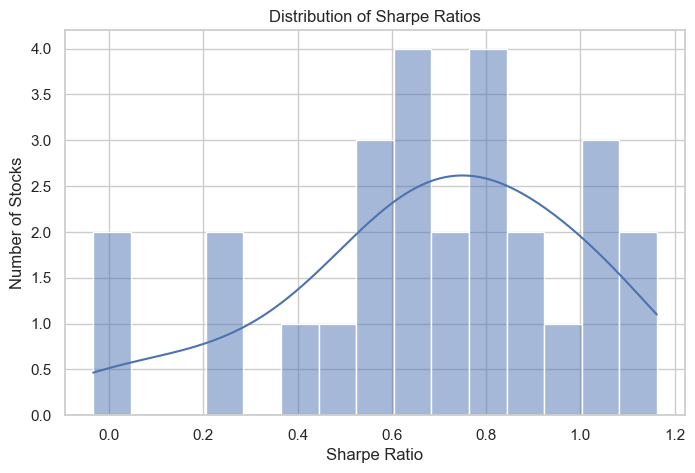

In [10]:
# Create DataFrame
perf_df = pd.DataFrame(performance_summary)

# Display summary statistics
print("\n=== Summary Statistics ===")
print(perf_df.describe().round(4))


# Mean values
mean_metrics = perf_df[['Return', 'Sharpe Ratio', 'Final Value', 'Max Drawdown']].mean()
print("\n=== Mean Metrics ===")
print(mean_metrics.round(4))

# --- Plots ---
sns.set(style="whitegrid")

# 1. Histogram of Sharpe ratios
plt.figure(figsize=(8, 5))
sns.histplot(perf_df['Sharpe Ratio'], kde=True, bins=15)
plt.title('Distribution of Sharpe Ratios')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Number of Stocks')
plt.show()

# 2. Optional: Save results to CSV
perf_df.to_csv('backtest_pe_results_universal_params.csv', index=False)

/var/folders/tp/t7h5dj8d7jjc96457jjj5ghm0000gn/T/ipykernel_7140/878063367.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


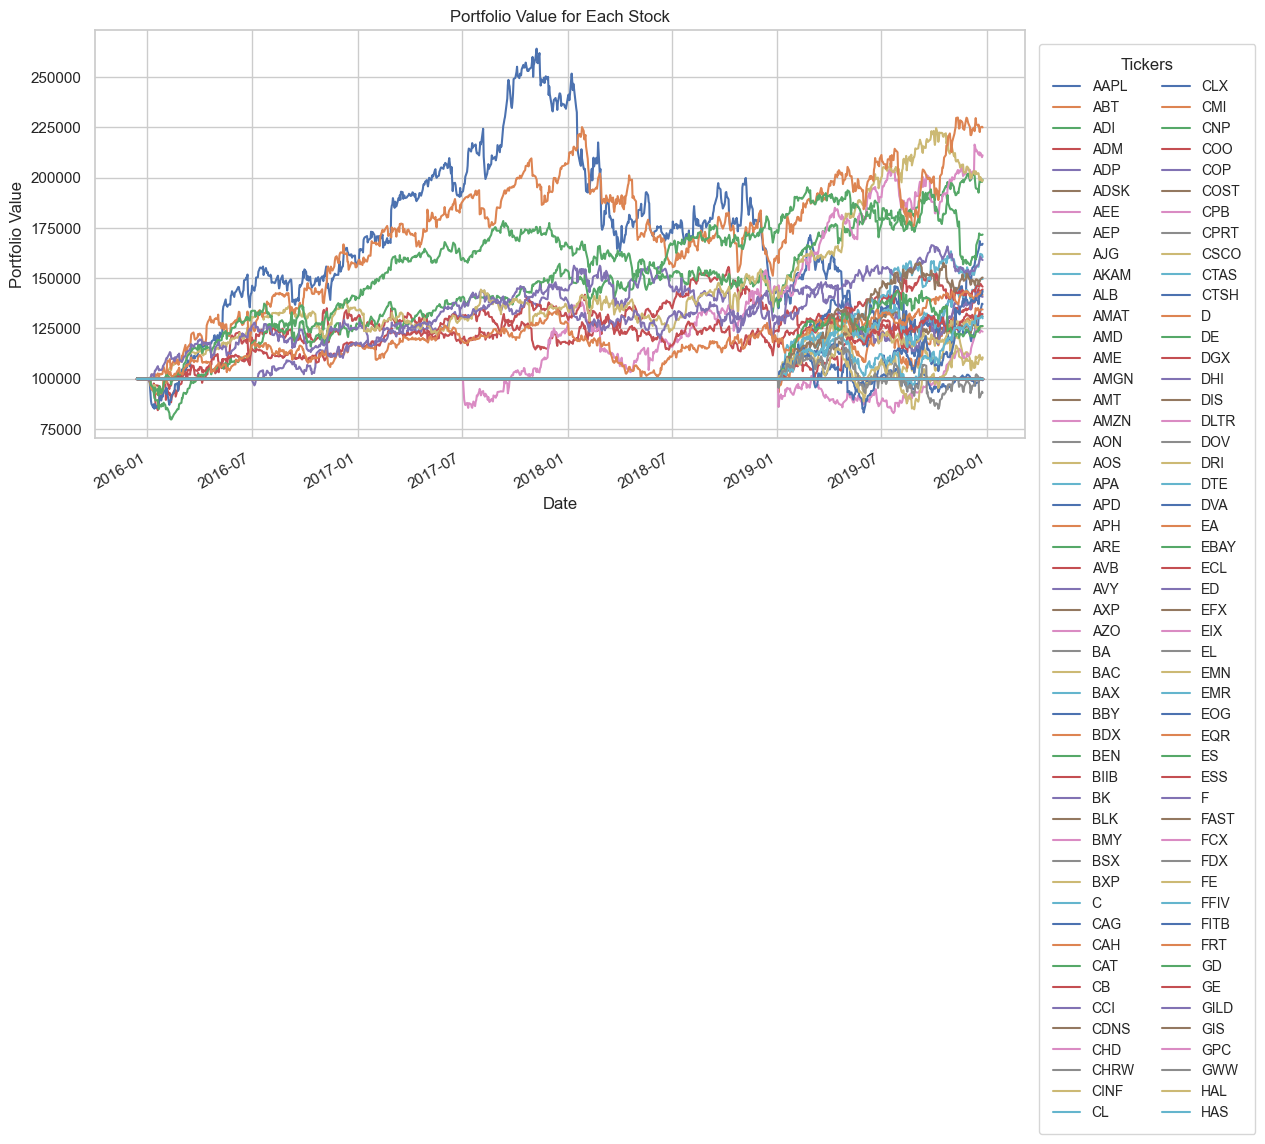

In [12]:
combined_portfolio = pd.concat(portfolio_series_list, axis=1)
ax = combined_portfolio.plot(figsize=(12, 6))

# Title and labels
plt.title('Portfolio Value for Each Stock')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')

# Customize legend
plt.legend(title='Tickers', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title_fontsize=12, ncol=2, borderpad=1, borderaxespad=1)

# Add grid and show plot
plt.grid(True)
plt.tight_layout()
plt.show()